# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

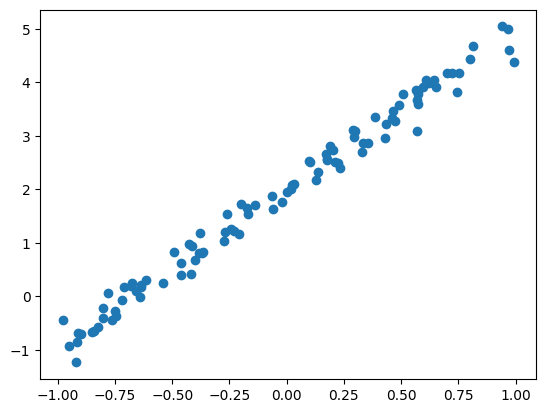

In [9]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3]);

# Training data points
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);
yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

Closed form expressions for $\beta_0, \beta_1$.

In [10]:
x_mean = np.mean(xd)
y_mean = np.mean(yd)

beta1 = np.sum((xd - x_mean) * (yd - y_mean)) / np.sum((xd - x_mean) ** 2)
beta0 = y_mean - beta1 * x_mean

analyticalModel = np.array([beta0, beta1])

print("Analytical Model Coefficients:", analyticalModel)

Analytical Model Coefficients: [2.00638679 2.95189039]


### Evaluate Your Model

Analytical model for randomly generated inputs

**Analytical Model Result**

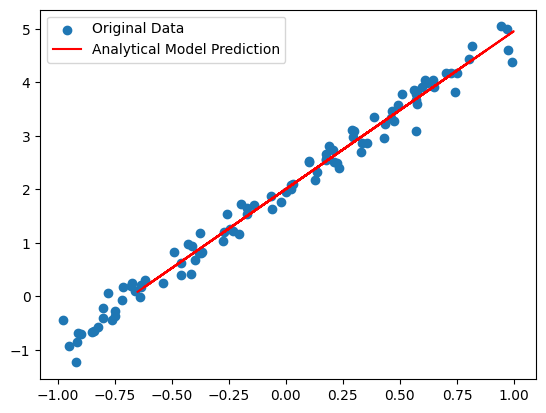

In [11]:
# new data
xplot = np.random.uniform(-1, 1, 20)  # Generate 20 random points between -1 and 1

# prediction using the analytical model
ypredict_analytical = beta0 + beta1 * xplot

fig, ax = plt.subplots()
ax.scatter(xd, yd, label='Original Data')
ax.plot(xplot, ypredict_analytical, color='red', label='Analytical Model Prediction')
ax.legend()
plt.show()


**Polyfit Model Prediction**

In [12]:
# Use polyfit to fit a linear model to the data
polyfitModel = np.polyfit(xd, yd, 1)

# Use polyval to evaluate polyfitModel at xplot
yfit = np.polyval(polyfitModel, xplot)


### Plot Result

Results of polyfit model and analytical model

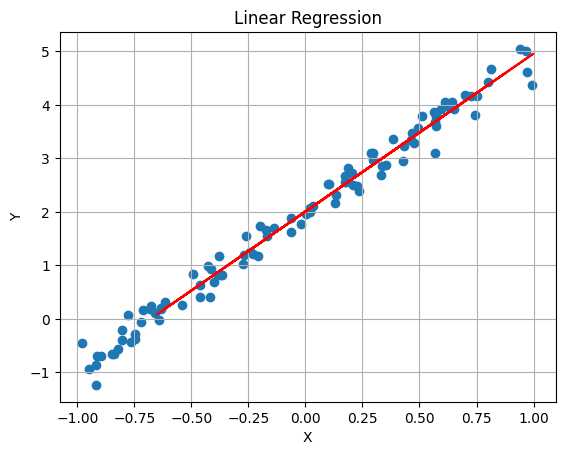

In [13]:

fig, ax = plt.subplots()
ax.scatter(xd, yd)

ax.plot(xplot, ypredict_analytical, color='red', label='Analytical Model Prediction')

# Polyfit Model Prediction
polyfitModel = np.polyfit(xd, yd, 1)
yfit = np.polyval(polyfitModel, xplot)


ax.set(xlabel='X', ylabel='Y',
       title='Linear Regression')
ax.grid()
plt.show()

## Application of Linear Regression

Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

Split data into train and test, by reserving **70** percent of the data for training and the rest for test.

In [14]:
# Load the dataset
url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)

# Split the data into training and test sets (70% train, 30% test)
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("Training data shape:", train.shape)
print("Test data shape:", test.shape)


Training data shape: (140, 4)
Test data shape: (60, 4)


### Linear Regression Model

Linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. 

In [15]:
# Separate the features (advertising) and the target (sales)
X_tv = df[['TV']]
X_newspaper = df[['newspaper']]
X_radio = df[['radio']]
y = df['sales']

# Create Linear Regression models for each medium
tv_model = LinearRegression()
newspaper_model = LinearRegression()
radio_model = LinearRegression()

# Fit the models to the data
tv_model.fit(X_tv, y)
newspaper_model.fit(X_newspaper, y)
radio_model.fit(X_radio, y)

# Get the coefficients (beta values) for each medium
sales_TV_beta = tv_model.coef_[0]
sales_newspaper_beta = newspaper_model.coef_[0]
sales_radio_beta = radio_model.coef_[0]

print("Sales vs. TV Advertising Coefficient (Beta):", sales_TV_beta)
print("Sales vs. Newspaper Advertising Coefficient (Beta):", sales_newspaper_beta)
print("Sales vs. Radio Advertising Coefficient (Beta):", sales_radio_beta)


Sales vs. TV Advertising Coefficient (Beta): 0.04753664043301975
Sales vs. Newspaper Advertising Coefficient (Beta): 0.05469309847227336
Sales vs. Radio Advertising Coefficient (Beta): 0.20249578339243965


### Plot Data

Models to do prediction and plot *test* data points and predctions of 3 models

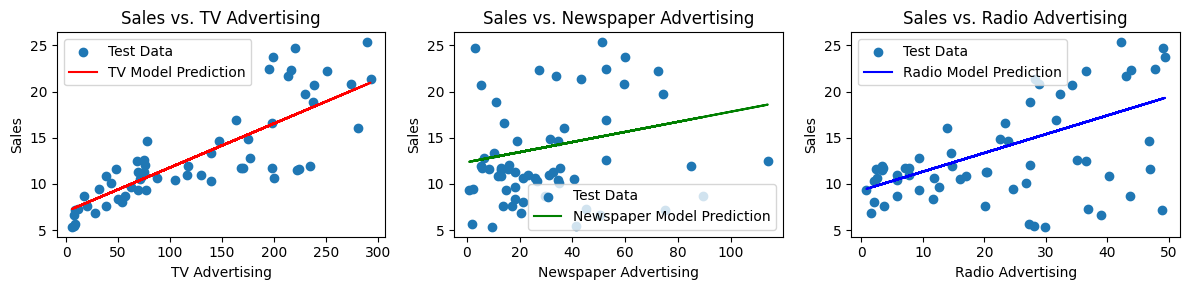

In [16]:
# Generate predictions for the test data
X_test_tv = test[['TV']]
X_test_newspaper = test[['newspaper']]
X_test_radio = test[['radio']]
y_test = test['sales']

y_pred_tv = tv_model.predict(X_test_tv)
y_pred_newspaper = newspaper_model.predict(X_test_newspaper)
y_pred_radio = radio_model.predict(X_test_radio)

# Plot the data and predictions
fig = plt.figure(figsize=(12, 3))

# Sales vs. TV Spend
plt.subplot(1, 3, 1)
plt.scatter(X_test_tv, y_test, label='Test Data')
plt.plot(X_test_tv, y_pred_tv, color='red', label='TV Model Prediction')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Sales vs. TV Advertising')
plt.legend()

# Sales vs. Newspaper Spend
plt.subplot(1, 3, 2)
plt.scatter(X_test_newspaper, y_test, label='Test Data')
plt.plot(X_test_newspaper, y_pred_newspaper, color='green', label='Newspaper Model Prediction')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.title('Sales vs. Newspaper Advertising')
plt.legend()

# Sales vs. Radio Spend
plt.subplot(1, 3, 3)
plt.scatter(X_test_radio, y_test, label='Test Data')
plt.plot(X_test_radio, y_pred_radio, color='blue', label='Radio Model Prediction')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Sales vs. Radio Advertising')
plt.legend()

plt.tight_layout()
plt.show()


## Multivariate Linear Regression

Using all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [17]:
# Separate the features (advertising) and the target (sales)
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Add a column of ones to X for the intercept term
X['Intercept'] = 1

# Define training X matrix
trainX = X.values

# Define training Y matrix
trainY = y.values

# Calculate the coefficients using the closed-form expression
XTX = np.dot(trainX.T, trainX)
XTY = np.dot(trainX.T, trainY)
multivariate_beta = np.dot(np.linalg.inv(XTX), XTY)

print("Multivariate Linear Regression Coefficients (Beta):", multivariate_beta)

Multivariate Linear Regression Coefficients (Beta): [ 4.57646455e-02  1.88530017e-01 -1.03749304e-03  2.93888937e+00]


### Evaluate Model

Using multivariate model to do predictions on test data

In [18]:
# Define testing X matrix
X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
testX = X.transpose()

# Define testing Y matrix
testY = test['sales']

# Predict results using your multivariate model (multivariate_beta)
pred = np.dot(testX, multivariate_beta)

# Print the predictions
print("Predictions on Test Data:", pred)

Predictions on Test Data: [489.90685179 584.22849691 868.96159664  42.91404354 648.03555163
 230.65557593 642.27945046 150.44715051 656.12097616 520.56064518
  93.01002349 170.804775   705.19913974  17.65692836 415.0335514
 506.87289948  29.27564619 583.4232567  227.45029861 699.78340008
 688.47629117 220.75691358 113.92525692 751.00595917 202.98915947
 161.30881329 633.8263474  411.34101633 261.18760268  25.10012857
 591.22999954 206.84573971 595.85140909  66.52224006 831.95320013
 701.05283553 143.54786416 815.64504353 345.48640969  84.76613367
 345.3039862  521.42612646 133.301599   186.57559926 661.29556168
 114.90921407 215.20677893 436.52029601 313.93311156 227.27097275
 236.32264425 497.36055248  39.70312002  32.4683621  227.36632673
 386.23312487 218.1746442  861.05086589  60.83215296 581.87899992]


### Plot Result

Plotting predictions against real labels.

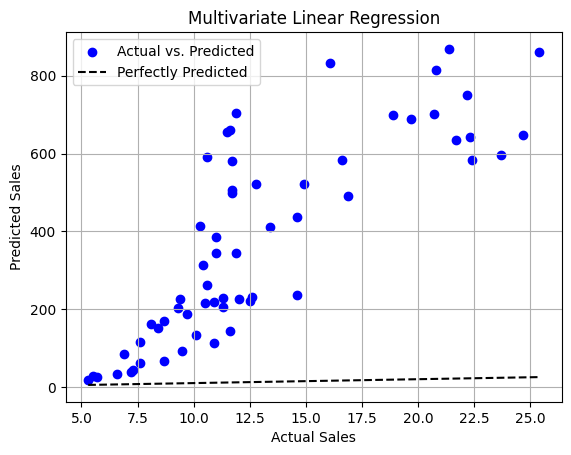

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot actual sales vs. predicted sales
ax.scatter(testY, pred, label='Actual vs. Predicted', color='blue')
ax.plot([testY.min(), testY.max()], [testY.min(), testY.max()], '--k', label='Perfectly Predicted')
ax.set(xlabel='Actual Sales', ylabel='Predicted Sales', title='Multivariate Linear Regression')
ax.legend()
ax.grid()

plt.show()
